# Penultimate Layer Visualization

### Imports and Setup

In [1]:
from util.penultimate_visualization import plotPenultimate
import datasets.datasets as datasets
from architectures.AlexNet import AlexNet
from torchvision.models import resnet34, ResNet34_Weights, ResNet
from torchvision.models import resnet50, ResNet50_Weights
from architectures.ResNet56 import resnet56
from architectures.FullyConnected import FullyConnected
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 20
class_indices = [0, 1, 2]

### Penultimate Layer of Fully Connected

In [4]:
# Loading training and validation datasets
mnist_training_loader = datasets.mnist_training_loader(False,batch_size=60000)
mnist_validation_loader = datasets.mnist_validation_loader()

# Loading trained model with hard labels
model = FullyConnected(1200,num_classes=10)
model.load_state_dict(torch.load('models/FC_MNIST_Accuracy_IMC/FullyConnected_MNIST_Hard_Labels.pt',map_location=device))

# Loading trained model with smooth labels
model_labelsmoothing = FullyConnected(1200,num_classes=10)
model_labelsmoothing.load_state_dict(torch.load('models/FC_MNIST_Accuracy_IMC/FullyConnected_MNIST_Smooth_Labels_01.pt',map_location=device))


<All keys matched successfully>

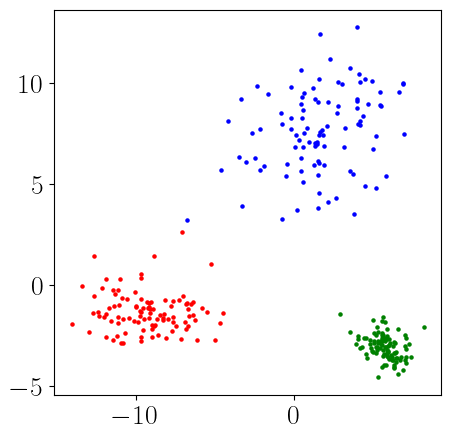

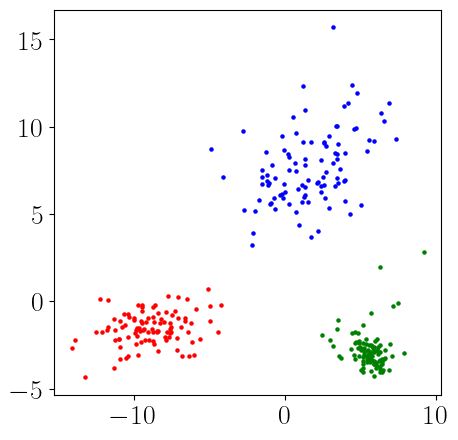

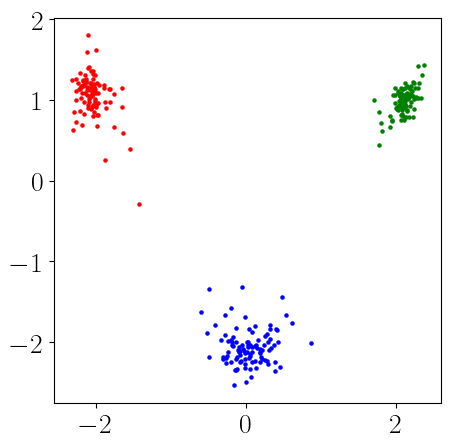

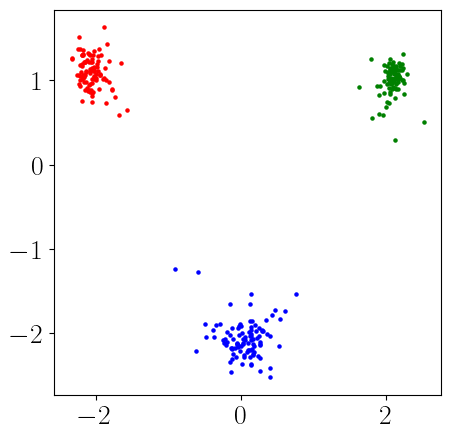

In [5]:
# Penultimate Layer for validation data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, mnist_validation_loader, "", ax, device)
fig.savefig("figures/fc_penultimate_plot_0.pdf", bbox_inches='tight')

# Penultimate Layer for training data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, mnist_training_loader, "", ax, device)
fig.savefig("figures/fc_penultimate_plot_1.pdf", bbox_inches='tight')

# Penultimate Layer for validation data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, mnist_validation_loader, "", ax, device)
fig.savefig("figures/fc_penultimate_plot_2.pdf", bbox_inches='tight')

# Penultimate Layer for training data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, mnist_training_loader, "", ax, device)
fig.savefig("figures/fc_penultimate_plot_3.pdf", bbox_inches='tight')

### Penultimate Layer of AlexNet

In [6]:
# Loading training and validation datasets
cifar10_training_loader = datasets.cifar10_training_loader(batch_size=50000)
cifar10_validation_loader = datasets.cifar10_validation_loader()

# Loading trained model with hard labels
model = AlexNet(num_classes=len(cifar10_training_loader.dataset.classes))
model.load_state_dict(torch.load('models/AlexNet_Accuracy_IMC/AlexNet_Hard_Labels.pt',map_location=device))

# Loading trained model with smooth labels
model_labelsmoothing = AlexNet(num_classes=len(cifar10_training_loader.dataset.classes))
model_labelsmoothing.load_state_dict(torch.load('models/AlexNet_Accuracy_IMC/AlexNet_Smooth_Labels_01.pt',map_location=device))

Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

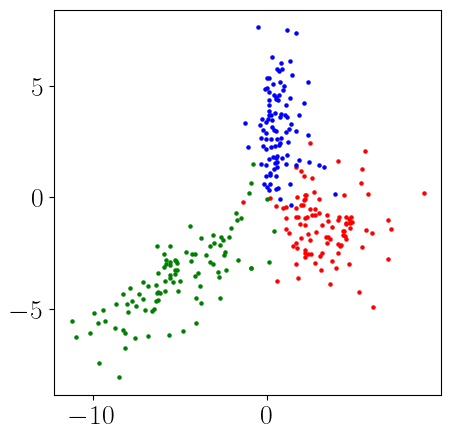

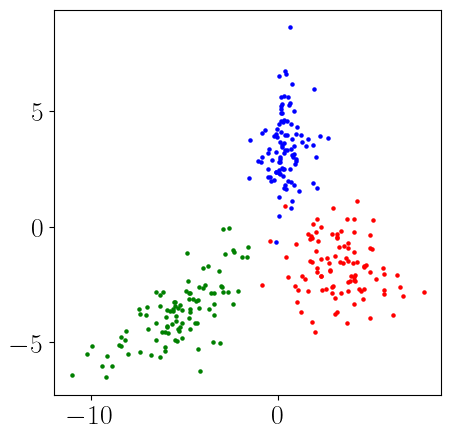

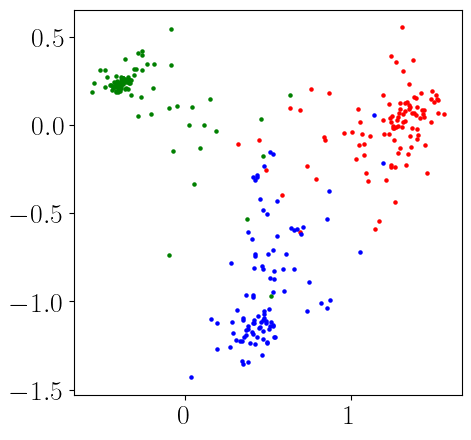

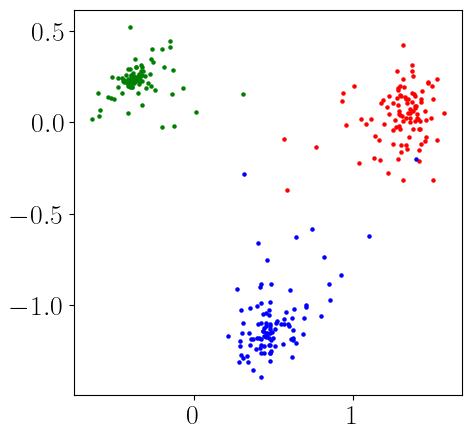

In [7]:
# Penultimate Layer for validation data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cifar10_validation_loader, "", ax, device)
fig.savefig("figures/alexnet_penultimate_plot_0.pdf", bbox_inches='tight')

# Penultimate Layer for training data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cifar10_training_loader, "", ax, device)
fig.savefig("figures/alexnet_penultimate_plot_1.pdf", bbox_inches='tight')

# Penultimate Layer for validation data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cifar10_validation_loader, "", ax, device)
fig.savefig("figures/alexnet_penultimate_plot_2.pdf", bbox_inches='tight')

# Penultimate Layer for training data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cifar10_training_loader, "", ax, device)
fig.savefig("figures/alexnet_penultimate_plot_3.pdf", bbox_inches='tight')

In [8]:
# Set penultimate property for the PyTorch ResNet Implementation
@property
def penultimate(self) -> nn.Module:
    """
    Returns the last two layers of the network.
    """
    return self.avgpool, self.fc

ResNet.penultimate = penultimate

### Penultimate Layer of ResNet34

In [10]:
# Loading training and validation datasets
cub_200_2011_training_loader = datasets.cub_200_2011_training_loader(batch_size = 5994)
cub_200_2011_validation_loader = datasets.cub_200_2011_validation_loader(batch_size = 5794)

# Loading trained model with hard labels
model= resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(512, 200)
model.load_state_dict(torch.load("models/ResNet34_Cub200_Accuracy_IMC/Cub200_ResNet34_Hard.pt",map_location=device))

# Loading trained model with smooth labels
model_labelsmoothing = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
model_labelsmoothing.fc = nn.Linear(512, 200)
model_labelsmoothing.load_state_dict(torch.load("models/ResNet34_Cub200_Accuracy_IMC/Cub200_ResNet34_Smooth_01.pt",map_location=device))

<All keys matched successfully>

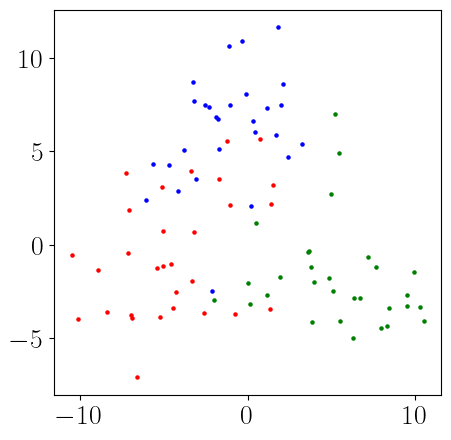

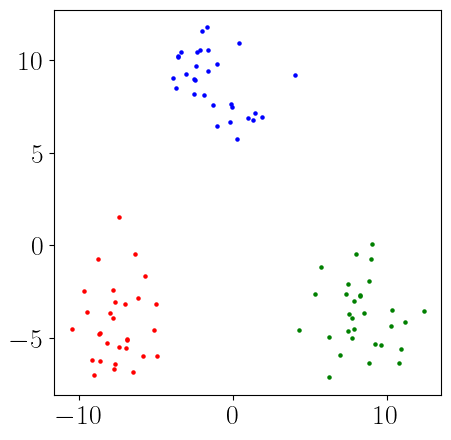

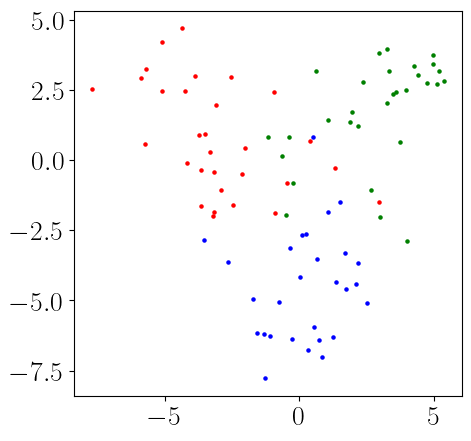

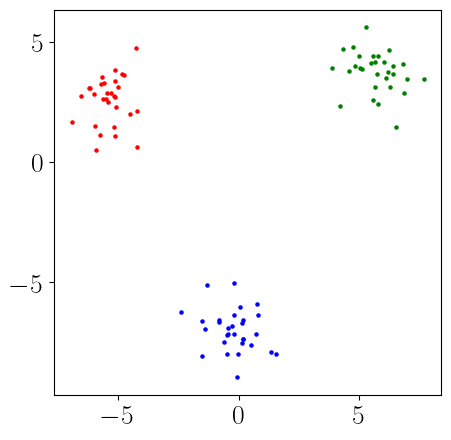

In [11]:
# Penultimate Layer for validation data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cub_200_2011_validation_loader, "", ax, device)
fig.savefig("figures/resnet34_penultimate_plot_0.pdf", bbox_inches='tight')

# Penultimate Layer for training data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cub_200_2011_training_loader, "", ax, device)
fig.savefig("figures/resnet34_penultimate_plot_1.pdf", bbox_inches='tight')

# Penultimate Layer for validation data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cub_200_2011_validation_loader, "", ax, device)
fig.savefig("figures/resnet34_penultimate_plot_2.pdf", bbox_inches='tight')

# Penultimate Layer for training data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cub_200_2011_training_loader, "", ax, device)
fig.savefig("figures/resnet34_penultimate_plot_3.pdf", bbox_inches='tight')

### Penultimate Layer of ResNet50

In [12]:
# Loading training and validation datasets
tinyimagenet_training_loader = datasets.tinyimagenet_training_loader(batch_size=100000)
tinyimagenet_validation_loader = datasets.tinyimagenet_validation_loader(batch_size=10000)

# Loading trained model with hard labels
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.fc = nn.Linear(2048, 200)
model.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Hard.pt",map_location=device))

# Loading trained model with smooth labels
model_labelsmoothing = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_labelsmoothing.fc = nn.Linear(2048, 200)
model_labelsmoothing.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_01.pt",map_location=device))

<All keys matched successfully>

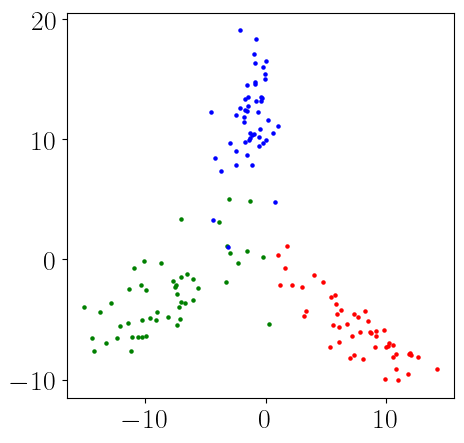

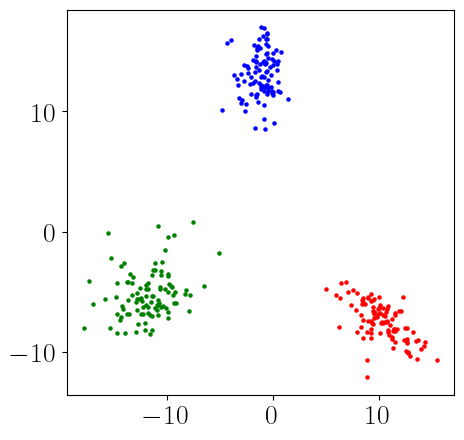

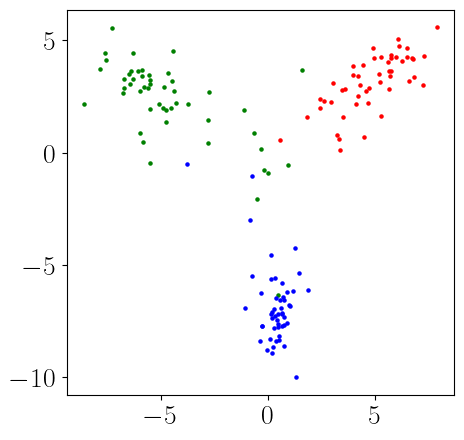

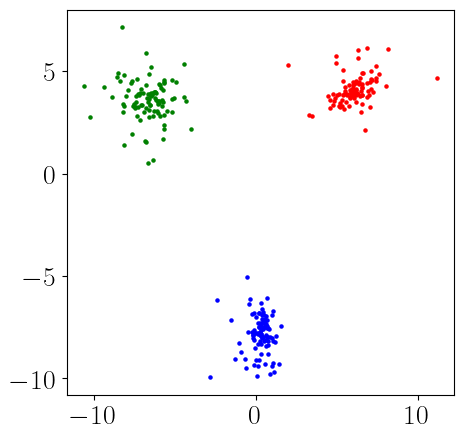

In [13]:
# Penultimate Layer for validation data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, tinyimagenet_validation_loader, "", ax, device)
fig.savefig("figures/resnet50_penultimate_plot_0.pdf", bbox_inches='tight')

# Penultimate Layer for training data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, tinyimagenet_training_loader, "", ax, device)
fig.savefig("figures/resnet50_penultimate_plot_1.pdf", bbox_inches='tight')

# Penultimate Layer for validation data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, tinyimagenet_validation_loader, "", ax, device)
fig.savefig("figures/resnet50_penultimate_plot_2.pdf", bbox_inches='tight')

# Penultimate Layer for training data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, tinyimagenet_training_loader, "", ax, device)
fig.savefig("figures/resnet50_penultimate_plot_3.pdf", bbox_inches='tight')

### Penultimate Layer of ResNet56

In [16]:
# Loading training and validation datasets
cifar100_training_loader = datasets.cifar100_training_loader(batch_size=40000)
cifar100_validation_loader = datasets.cifar100_validation_loader()

# Loading trained model with hard labels
model = resnet56(num_classes=100, cifar100=True)
model.load_state_dict(torch.load('models/ResNet56_CIFAR100_Accuracy_IMC/ResNet_Hard_Labels_CIFAR100.pt',map_location=device))

# Loading trained model with smooth labels
model_labelsmoothing = resnet56(num_classes=100, cifar100=True)
model_labelsmoothing.load_state_dict(torch.load('models/ResNet56_CIFAR100_Accuracy_IMC/ResNet_Smooth_Labels_01_CIFAR100.pt',map_location=device))

Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

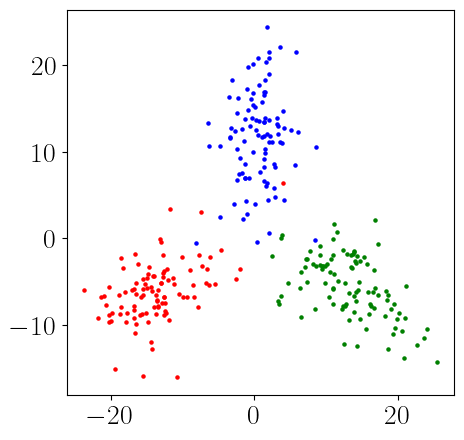

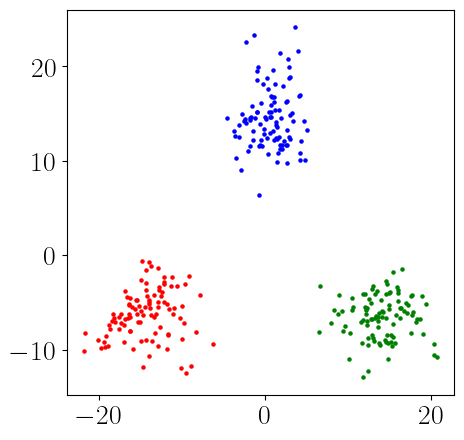

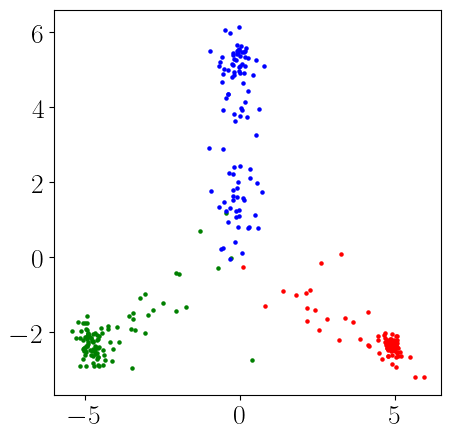

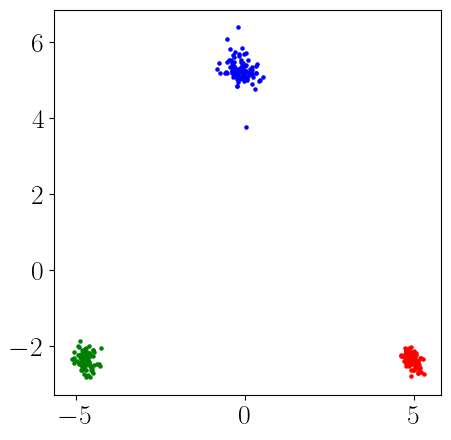

In [15]:
# Penultimate Layer for validation data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cifar100_validation_loader, "", ax, device)
fig.savefig("figures/resnet56_penultimate_plot_0.pdf", bbox_inches='tight')

# Penultimate Layer for training data with hard labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model, class_indices, cifar100_training_loader, "", ax, device)
fig.savefig("figures/resnet56_penultimate_plot_1.pdf", bbox_inches='tight')

# Penultimate Layer for validation data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cifar100_validation_loader, "", ax, device)
fig.savefig("figures/resnet56_penultimate_plot_2.pdf", bbox_inches='tight')

# Penultimate Layer for training data with smooth labels
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plotPenultimate(model_labelsmoothing, class_indices, cifar100_training_loader, "", ax, device)
fig.savefig("figures/resnet56_penultimate_plot_3.pdf",bbox_inches='tight')